# THIS CODE IS FOR CHECKING WHICH PLOT WAS ON WHICH FLIGHT LINE IN RESPECTIVE YEAR

In [10]:
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, box, mapping
from matplotlib import pyplot as plt
import numpy as np
from geopandas.io.file import _to_file
import fiona
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from rasterio.crs import CRS
from rasterio.windows import Window
from tqdm import tqdm
import glob
import re
import contextily as ctx
from pathlib import Path

In [12]:
# Lambertian Method
# 2010
FL_42_2010_LAM =  r"D:/.../TRU_subset/CHNP1100624_042e_polishRefl_sub.bsq"
FL_52_2010_LAM =  r"D:/.../TRU_subset/CHNP1100624_052e_polishRefl_sub.bsq"
FL_62_2010_LAM =  r"D:/.../TRU_subset/CHNP1100624_062e_polishRefl_sub.bsq"
FL_72_2010_LAM =  r"D:/.../TRU_subset/CHNP1100624_072e_polishRefl_sub.bsq"
# 2012
FL_12_S1_2012_LAM =  r"D:/.../L_2012_APEX/CHNP2120629_a12d_polish_cube000_geo_s1.bsq" #v
FL_32_S1_2012_LAM =  r"D:/.../L_2012_APEX/CHNP2120629_a32d_polish_cube000_geo_s1.bsq" #v
FL_42_S1_2012_LAM =  r"D:/.../L_2012_APEX/CHNP2120629_a42d_polish_cube000_geo_s1.bsq" #v
# FL_12_S2_2012_LAM =  r"D:/.../L_2012_APEX/CHNP2120629_a12d_polish_cube000_geo_s2.bsq"
# FL_32_S2_2012_LAM =  r"D:/.../L_2012_APEX/CHNP2120629_a32d_polish_cube000_geo_s2.bsq"
# FL_42_S2_2012_LAM =  r"D:/.../L_2012_APEX/CHNP2120629_a42d_polish_cube000_geo_s2.bsq"
# 2013
FL_12_S1_2013_LAM  =  r"D:/.../L_2013_APEX/M0038130712_a012e_reflct_cube000_geo.bsq"
FL_32_S1_2013_LAM  =  r"D:/.../L_2013_APEX/M0038130712_a032e_reflct_cube000_geo.bsq"
FL_52_S1_2013_LAM  =  r"D:/.../L_2013_APEX/M0038130712_a052e_reflct_cube000_geo.bsq"
# FL_12_S2_2013_LAM  =  r"D:/.../L_2013_APEX/M0039130712_a012e_reflct_cube000_geo.bsq" # not in ROI
# FL_32_S2_2013_LAM  =  r"D:/.../L_2013_APEX/M0039130712_a032e_reflct_cube000_geo.bsq" # not in ROI
# FL_92_2013_LAM     =  r"D:/.../L_2013_APEX/M0039130712_a092e_reflct_cube000_geo.bsq" # not in ROI
# FL_112_S3_2013_LAM =  r"D:/.../L_2013_APEX/M0039130712_a112e_reflct_cube000_geo.bsq" # not in ROI

# Minnaert Method
# 2010
FL_42_2010_MIN  =  r"D:/.../MM010_CHNP__100624_a042e_reflct_cube000_smcorr_geo.bsq"
FL_52_2010_MIN  =  r"D:/.../MM010_CHNP__100624_a052e_reflct_cube000_smcorr_geo.bsq"
FL_72_2010_MIN  =  r"D:/.../MM010_CHNP__100624_a072e_reflct_cube000_smcorr_geo.bsq"
# 2012
FL_12_2010_MIN  =  r"D:/.../SNP_2012/MM047_CHNP__120629_a012e_reflct_cube000_geo.bsq"
FL_22_2010_MIN  =  r"D:/.../SNP_2012/MM047_CHNP__120629_a022e_reflct_cube000_geo.bsq"
FL_32_2010_MIN  =  r"D:/.../SNP_2012/MM047_CHNP__120629_a032e_reflct_cube000_geo.bsq"
# 2013
# FL_65_52_2010_MIN  =  r"D:/.../SNP_2013/MM065_CHNP__130712_a052e_reflct_cube000_geo.bsq" # v
# FL_65_42_2010_MIN  =  r"D:/.../SNP_2013/MM065_CHNP__130712_a042e_reflct_cube000_geo.bsq" # v
# FL_65_12_2010_MIN  =  r"D:/.../SNP_2013/MM065_CHNP__130712_a012e_reflct_cube000_geo.bsq" # v
# FL_62_2010_MIN  =  r"D:/.../SNP_2013/MM064_CHNP__130712_a062e_reflct_cube000_geo.bsq" # v
FL_52_2010_MIN  =  r"D:/.../SNP_2013/MM064_CHNP__130712_a052e_reflct_cube000_geo.bsq" # v
FL_42_2010_MIN  =  r"D:/.../SNP_2013/MM064_CHNP__130712_a042e_reflct_cube000_geo.bsq" # v
FL_32_2010_MIN  =  r"D:/.../SNP_2013/MM064_CHNP__130712_a032e_reflct_cube000_geo.bsq" # v
FL_22_2010_MIN  =  r"D:/.../SNP_2013/MM064_CHNP__130712_a022e_reflct_cube000_geo.bsq" # v
# FL_65_62_2010_MIN  =  r"D:/.../SNP_2013/MM065_CHNP__130712_a062e_reflct_cube000_geo.bsq" # not in ROI
# FL_65_32_2010_MIN  =  r"D:/.../SNP_2013/MM065_CHNP__130712_a032e_reflct_cube000_geo.bsq" # not in ROI
# FL_65_22_2010_MIN  =  r"D:/.../SNP_2013/MM065_CHNP__130712_a022e_reflct_cube000_geo.bsq" # not in ROI

# modified Minnaert Method
# 2010
FL_42_2010_MOD  =  r"D:/.../2010/MM010_CHNP__100624_a042e_reflct_cube000_smcorr_geo.bsq"
FL_52_2010_MOD  =  r"D:/.../2010/MM010_CHNP__100624_a052e_reflct_cube000_smcorr_geo.bsq"
FL_72_2010_MOD  =  r"D:/.../2010/MM010_CHNP__100624_a072e_reflct_cube000_smcorr_geo.bsq"
# 2012
FL_12_2010_MOD  =  r"D:/.../2012/MM047_CHNP__120629_a012e_reflct_cube000_smcorr_geo.bsq"
FL_22_2010_MOD  =  r"D:/.../2012/MM047_CHNP__120629_a022e_reflct_cube000_smcorr_geo.bsq"
FL_32_2010_MOD  =  r"D:/.../2012/MM047_CHNP__120629_a032e_reflct_cube000_smcorr_geo.bsq"
# 2013
FL_42_2010_MOD  =  r"D:/.../2013/MM064_CHNP__130712_a042e_reflct_cube000_smcorr_geo.bsq"
FL_32_2010_MOD  =  r"D:/.../2013/MM064_CHNP__130712_a032e_reflct_cube000_smcorr_geo.bsq"
FL_22_2010_MOD  =  r"D:/.../2013/MM064_CHNP__130712_a022e_reflct_cube000_smcorr_geo.bsq"

{'driver': 'ENVI', 'dtype': 'int16', 'nodata': None, 'width': 2250, 'height': 2051, 'count': 285, 'crs': CRS.from_epsg(21781), 'transform': Affine(2.0, -0.0, 800385.0,
       -0.0, -2.0, 165077.0), 'tiled': False, 'interleave': 'band'}


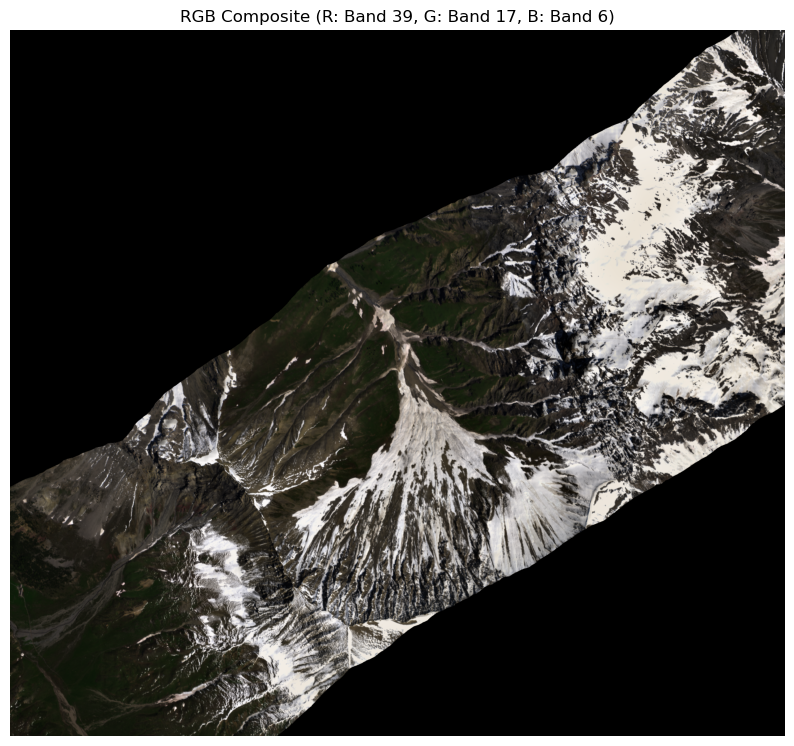

In [13]:
# Open the raster
with rasterio.open(FL_42_2010_LAM) as src:
    print(src.profile)  # Check metadata, e.g., count of bands
    
    # Read bands (rasterio band index starts at 1)
    band_red = src.read(39)
    band_green = src.read(17)
    band_blue = src.read(6)

# Normalize the bands to [0, 1] for display
def normalize(array):
    array_min, array_max = np.nanmin(array), np.nanmax(array)
    return (array - array_min) / (array_max - array_min)

red_norm = normalize(band_red)
green_norm = normalize(band_green)
blue_norm = normalize(band_blue)

# Stack bands into an RGB image
rgb = np.dstack((red_norm, green_norm, blue_norm))

# Plot the RGB image
plt.figure(figsize=(10, 10))
plt.imshow(rgb)
plt.title('RGB Composite (R: Band 39, G: Band 17, B: Band 6)')
plt.axis('off')
plt.show()

In [21]:
# =========================
# Run ONE method (year-matched points) — robust & simple
# =========================

from pathlib import Path
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from shapely.geometry import Point
from tqdm import tqdm
from pyproj import CRS, Transformer
from pyproj.exceptions import ProjError

# -------------------------
# (A) CHOOSE THE METHOD BY FILLING THESE THREE LISTS
#    Example below is for LAMBERTIAN.
#    For Minnaert or Modified Minnaert, replace with your lists.
# -------------------------

METHOD_NAME = "Lambertian"

METHOD_2010 = [
     r"D:/.../TRU_subset/CHNP1100624_042e_polishRefl_sub.bsq",
     r"D:/.../TRU_subset/CHNP1100624_052e_polishRefl_sub.bsq",
     r"D:/.../TRU_subset/CHNP1100624_062e_polishRefl_sub.bsq",
     r"D:/.../TRU_subset/CHNP1100624_072e_polishRefl_sub.bsq",
]
METHOD_2012 = [
     r"D:/.../L_2012_APEX/CHNP2120629_a12d_polish_cube000_geo_s1.bsq",
     r"D:/.../L_2012_APEX/CHNP2120629_a32d_polish_cube000_geo_s1.bsq",
     r"D:/.../L_2012_APEX/CHNP2120629_a42d_polish_cube000_geo_s1.bsq",
]
METHOD_2013 = [
     r"D:/.../L_2013_APEX/M0038130712_a012e_reflct_cube000_geo.bsq",
     r"D:/.../L_2013_APEX/M0038130712_a032e_reflct_cube000_geo.bsq",
     r"D:/.../L_2013_APEX/M0038130712_a052e_reflct_cube000_geo.bsq",
]

# -------------------------
# (B) STATIC INPUTS (points, bands, output)
# -------------------------
CSV_2010 = Path("PPR1_Map_Data/No_Duplicates_Processing_1_Model_input_2010_REF_INTERPOLATED_with_Metadata_Plots_All-Accurate.csv")
CSV_2012 = Path("PPR1_Map_Data/No_Duplicates_Processing_1_Model_input_2012_REF_INTERPOLATED_with_Metadata_Plots_All-Accurate.csv")
CSV_2013 = Path("PPR1_Map_Data/No_Duplicates_Processing_1_Model_input_2013_REF_INTERPOLATED_with_Metadata_Plots_All-Accurate.csv")

CSV_CRS  = "EPSG:2056"              # your CSVs are LV95
X_CANDS = ["X_east"]
Y_CANDS = ["Y_north"]
RGB_BANDS = (39, 17, 6)             # (R, G, B) indices (1-based)
OUTPUT_ROOT = Path(f"overlay_previews_{METHOD_NAME}")
CRS_FALLBACK = "EPSG:21781"         # robust fallback (LV03). Change if your rasters are different.

plt.rcParams.update({"font.family": "Palatino Linotype", "font.size": 12})

# -------------------------
# (C) HELPERS
# -------------------------
def csv_points_to_gdf(csv_path: Path, src_crs: str) -> gpd.GeoDataFrame:
    df = pd.read_csv(csv_path)
    x_col = next((c for c in X_CANDS if c in df.columns), None)
    y_col = next((c for c in Y_CANDS if c in df.columns), None)
    if x_col is None or y_col is None:
        raise ValueError(
            f"Could not find coordinate columns in {csv_path.name}. "
            f"Tried X={X_CANDS}, Y={Y_CANDS}. Columns: {list(df.columns)}"
        )
    gdf = gpd.GeoDataFrame(df, geometry=[Point(xy) for xy in zip(df[x_col], df[y_col])], crs=src_crs)
    if gdf.crs is None:
        gdf.set_crs(src_crs, inplace=True)
    elif gdf.crs.to_string() != src_crs:
        gdf = gdf.to_crs(src_crs)
    return gdf

def normalize(array):
    arr = array.astype("float32")
    amin, amax = np.nanmin(arr), np.nanmax(arr)
    if np.isclose(amax, amin): return np.zeros_like(arr)
    return (arr - amin) / (amax - amin)

def reproject_points(pts: gpd.GeoDataFrame, target_crs, fallback_crs=CRS_FALLBACK) -> gpd.GeoDataFrame:
    """Try to reproject to target_crs; if that errors, use fallback_crs."""
    if target_crs is None:
        # no CRS on raster → use fallback directly
        return pts.to_crs(fallback_crs)
    try:
        return pts.to_crs(target_crs)
    except Exception:
        return pts.to_crs(fallback_crs)

def filter_points_real_pixels_by_sampling(pts: gpd.GeoDataFrame, src, band_indexes=(1,2,3), valid_min=0.0, fallback_crs=CRS_FALLBACK) -> gpd.GeoDataFrame:
    """Keep only points that land on real imagery by sampling RGB; robust reprojection."""
    if pts.empty: return pts
    pts_r = reproject_points(pts, src.crs, fallback_crs=fallback_crs)
    coords = np.vstack([pts_r.geometry.x.values, pts_r.geometry.y.values]).T
    samples = list(src.sample(coords, indexes=band_indexes, masked=True))
    keep = []
    nodata = src.nodata
    for s in samples:
        if np.ma.is_masked(s) and np.any(s.mask):
            keep.append(False); continue
        vals = np.asarray(s, dtype="float64")
        if nodata is not None and np.all(vals == nodata):
            keep.append(False); continue
        if np.all(vals <= valid_min):
            keep.append(False); continue
        keep.append(True)
    keep = np.array(keep, dtype=bool)
    return pts_r.iloc[keep].copy()

def plot_save(rgb, src, pts_valid, out_path: Path, title: str):
    extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)
    fig = plt.figure(figsize=(10, 10)); ax = plt.gca()
    ax.imshow(rgb, extent=extent, origin="upper")
    if not pts_valid.empty:
        pts_valid.plot(ax=ax, markersize=10, edgecolor="black", facecolor="none")
        pts_valid.geometry.centroid.plot(ax=ax, markersize=8)
    crs_label = src.crs.to_string() if src.crs else f"(fallback {CRS_FALLBACK})"
    ax.set_title(title)
    ax.set_xlabel(f"CRS: {crs_label}")
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_xlim([src.bounds.left, src.bounds.right]); ax.set_ylim([src.bounds.bottom, src.bounds.top])
    out_path.parent.mkdir(parents=True, exist_ok=True)
    plt.tight_layout(); plt.savefig(out_path, dpi=200); plt.close(fig)

def run_one_method(method_name: str, paths_by_year: dict, output_root: Path) -> pd.DataFrame:
    """paths_by_year = {2010: [..], 2012: [..], 2013: [..]}"""
    # load points once
    pts_by_year = {
        2010: csv_points_to_gdf(CSV_2010, CSV_CRS),
        2012: csv_points_to_gdf(CSV_2012, CSV_CRS),
        2013: csv_points_to_gdf(CSV_2013, CSV_CRS),
    }

    rows = []

    for year in [2010, 2012, 2013]:
        rlist = paths_by_year.get(year, [])
        pts = pts_by_year[year]
        out_dir = output_root / method_name / str(year)

        for rpath in tqdm(rlist, desc=f"{method_name} {year}", unit="file"):
            rpath = Path(rpath)
            if not rpath.exists():
                print(f"[SKIP] Missing raster: {rpath}")
                continue
            try:
                with rasterio.open(rpath) as src:
                    r = normalize(src.read(RGB_BANDS[0]))
                    g = normalize(src.read(RGB_BANDS[1]))
                    b = normalize(src.read(RGB_BANDS[2]))
                    rgb = np.dstack((r, g, b))

                    pts_valid = filter_points_real_pixels_by_sampling(
                        pts, src, band_indexes=RGB_BANDS, valid_min=0.0, fallback_crs=CRS_FALLBACK
                    )
                    n = len(pts_valid)

                    out_png = out_dir / f"{rpath.stem}_{year}_{n}_pts.png"
                    title = f"{rpath.stem} — Year {year}: {n} points in view"
                    plot_save(rgb, src, pts_valid, out_png, title)

                # row with only the matching year filled
                row = {"Method": method_name, "Name": rpath.name, "path": str(rpath),
                       "year_2010": 0, "year_2012": 0, "year_2013": 0}
                row[f"year_{year}"] = n
                rows.append(row)

            except Exception as e:
                print(f"[ERROR] {method_name} {year} — {rpath.name}: {e}")
                rows.append({"Method": method_name, "Name": rpath.name, "path": str(rpath),
                             "year_2010": np.nan, "year_2012": np.nan, "year_2013": np.nan})

    df = pd.DataFrame(rows).sort_values(["Method", "Name"]).reset_index(drop=True)
    out_csv = output_root / method_name / f"{method_name}_overlay_counts_summary.csv"
    out_csv.parent.mkdir(parents=True, exist_ok=True)
    df.to_csv(out_csv, index=False)
    print(f"\n{method_name}: saved {len(df)} rows → {out_csv}")
    return df

# -------------------------
# (D) RUN for the method you filled above
# -------------------------
paths_by_year = {2010: METHOD_2010, 2012: METHOD_2012, 2013: METHOD_2013}
df_method = run_one_method(METHOD_NAME, paths_by_year, OUTPUT_ROOT)
display(df_method.head(30))


Lambertian 2013: 100%|█████████████████████████████████████████████████████████████████| 3/3 [01:38<00:00, 32.91s/file]



Lambertian: saved 10 rows → overlay_previews_Lambertian\Lambertian\Lambertian_overlay_counts_summary.csv


,Method,Name,path,year_2010,year_2012,year_2013
0,Lambertian,CHNP1100624_042e_polishRefl_sub.bsq,D:\Main_Data_From_Christian_Anna-s_1st_SNP_DAT...,9,0,0
1,Lambertian,CHNP1100624_052e_polishRefl_sub.bsq,D:\Main_Data_From_Christian_Anna-s_1st_SNP_DAT...,19,0,0
2,Lambertian,CHNP1100624_062e_polishRefl_sub.bsq,D:\Main_Data_From_Christian_Anna-s_1st_SNP_DAT...,10,0,0
3,Lambertian,CHNP1100624_072e_polishRefl_sub.bsq,D:\Main_Data_From_Christian_Anna-s_1st_SNP_DAT...,5,0,0
4,Lambertian,CHNP2120629_a12d_polish_cube000_geo_s1.bsq,D:\Main_Data_From_Christian_Anna-s_1st_SNP_DAT...,0,33,0
5,Lambertian,CHNP2120629_a32d_polish_cube000_geo_s1.bsq,D:\Main_Data_From_Christian_Anna-s_1st_SNP_DAT...,0,65,0
6,Lambertian,CHNP2120629_a42d_polish_cube000_geo_s1.bsq,D:\Main_Data_From_Christian_Anna-s_1st_SNP_DAT...,0,26,0
7,Lambertian,M0038130712_a012e_reflct_cube000_geo.bsq,D:\Main_Data_From_Christian_Anna-s_1st_SNP_DAT...,0,0,47
8,Lambertian,M0038130712_a032e_reflct_cube000_geo.bsq,D:\Main_Data_From_Christian_Anna-s_1st_SNP_DAT...,0,0,78
9,Lambertian,M0038130712_a052e_reflct_cube000_geo.bsq,D:\Main_Data_From_Christian_Anna-s_1st_SNP_DAT...,0,0,33


In [24]:
# =========================
# Run ONE method (year-matched points) — MINNAERT
# Robust CRS fallback + real-pixel sampling (no black margins)
# =========================

from pathlib import Path
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from shapely.geometry import Point
from tqdm import tqdm
from pyproj.exceptions import ProjError

# -------------------------
# (A) METHOD: MINNAERT (your paths)
# -------------------------
METHOD_NAME = "Minnaert"

METHOD_2010 = [
     r"D:/.../MM010_CHNP__100624_a042e_reflct_cube000_smcorr_geo.bsq",
     r"D:/.../MM010_CHNP__100624_a052e_reflct_cube000_smcorr_geo.bsq",
     r"D:/.../MM010_CHNP__100624_a072e_reflct_cube000_smcorr_geo.bsq",
]
METHOD_2012 = [
     r"D:/.../SNP_2012/MM047_CHNP__120629_a012e_reflct_cube000_geo.bsq",
     r"D:/.../SNP_2012/MM047_CHNP__120629_a022e_reflct_cube000_geo.bsq",
     r"D:/.../SNP_2012/MM047_CHNP__120629_a032e_reflct_cube000_geo.bsq",
]
METHOD_2013 = [
     r"D:/.../SNP_2013/MM064_CHNP__130712_a052e_reflct_cube000_geo.bsq",
     r"D:/.../SNP_2013/MM064_CHNP__130712_a042e_reflct_cube000_geo.bsq",
     r"D:/.../SNP_2013/MM064_CHNP__130712_a032e_reflct_cube000_geo.bsq",
     r"D:/.../SNP_2013/MM064_CHNP__130712_a022e_reflct_cube000_geo.bsq",
]

# -------------------------
# (B) STATIC INPUTS (points, bands, output)
# -------------------------
CSV_2010 = Path("PPR1_Map_Data/No_Duplicates_Processing_1_Model_input_2010_REF_INTERPOLATED_with_Metadata_Plots_All-Accurate.csv")
CSV_2012 = Path("PPR1_Map_Data/No_Duplicates_Processing_1_Model_input_2012_REF_INTERPOLATED_with_Metadata_Plots_All-Accurate.csv")
CSV_2013 = Path("PPR1_Map_Data/No_Duplicates_Processing_1_Model_input_2013_REF_INTERPOLATED_with_Metadata_Plots_All-Accurate.csv")

CSV_CRS  = "EPSG:2056"              # CSVs in LV95
X_CANDS = ["X_east"]
Y_CANDS = ["Y_north"]
RGB_BANDS = (39, 17, 6)             # (R, G, B) indices (1-based)
OUTPUT_ROOT = Path(f"overlay_previews_{METHOD_NAME}")
CRS_FALLBACK =  "EPSG:2056" # "EPSG:21781"         # fallback if raster CRS is missing/bad; switch to "EPSG:2056" if needed

plt.rcParams.update({"font.family": "Palatino Linotype", "font.size": 12})

# -------------------------
# (C) HELPERS
# -------------------------
def csv_points_to_gdf(csv_path: Path, src_crs: str) -> gpd.GeoDataFrame:
    df = pd.read_csv(csv_path)
    x_col = next((c for c in X_CANDS if c in df.columns), None)
    y_col = next((c for c in Y_CANDS if c in df.columns), None)
    if x_col is None or y_col is None:
        raise ValueError(
            f"Could not find coordinate columns in {csv_path.name}. "
            f"Tried X={X_CANDS}, Y={Y_CANDS}. Columns: {list(df.columns)}"
        )
    gdf = gpd.GeoDataFrame(df, geometry=[Point(xy) for xy in zip(df[x_col], df[y_col])], crs=src_crs)
    if gdf.crs is None:
        gdf.set_crs(src_crs, inplace=True)
    elif gdf.crs.to_string() != src_crs:
        gdf = gdf.to_crs(src_crs)
    return gdf

def normalize(array):
    arr = array.astype("float32")
    amin, amax = np.nanmin(arr), np.nanmax(arr)
    if np.isclose(amax, amin): return np.zeros_like(arr)
    return (arr - amin) / (amax - amin)

def reproject_points(pts: gpd.GeoDataFrame, target_crs, fallback_crs=CRS_FALLBACK) -> gpd.GeoDataFrame:
    """Try target_crs; if it fails or raster has no CRS, use fallback."""
    if target_crs is None:
        return pts.to_crs(fallback_crs)
    try:
        return pts.to_crs(target_crs)
    except Exception:
        return pts.to_crs(fallback_crs)

def filter_points_real_pixels_by_sampling(pts: gpd.GeoDataFrame, src, band_indexes=(1,2,3), valid_min=0.0, fallback_crs=CRS_FALLBACK) -> gpd.GeoDataFrame:
    """Keep only points that land on real imagery (not black margins)."""
    if pts.empty: return pts
    pts_r = reproject_points(pts, src.crs, fallback_crs=fallback_crs)
    coords = np.vstack([pts_r.geometry.x.values, pts_r.geometry.y.values]).T
    samples = list(src.sample(coords, indexes=band_indexes, masked=True))
    keep = []
    nodata = src.nodata
    for s in samples:
        if np.ma.is_masked(s) and np.any(s.mask):
            keep.append(False); continue
        vals = np.asarray(s, dtype="float64")
        if nodata is not None and np.all(vals == nodata):
            keep.append(False); continue
        if np.all(vals <= valid_min):     # reject pure black pads
            keep.append(False); continue
        keep.append(True)
    keep = np.array(keep, dtype=bool)
    return pts_r.iloc[keep].copy()

def plot_save(rgb, src, pts_valid, out_path: Path, title: str):
    extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)
    fig = plt.figure(figsize=(10, 10)); ax = plt.gca()
    ax.imshow(rgb, extent=extent, origin="upper")
    if not pts_valid.empty:
        pts_valid.plot(ax=ax, markersize=10, edgecolor="black", facecolor="none")
        pts_valid.geometry.centroid.plot(ax=ax, markersize=8)
    crs_label = src.crs.to_string() if src.crs else f"(fallback {CRS_FALLBACK})"
    ax.set_title(title)
    ax.set_xlabel(f"CRS: {crs_label}")
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_xlim([src.bounds.left, src.bounds.right]); ax.set_ylim([src.bounds.bottom, src.bounds.top])
    out_path.parent.mkdir(parents=True, exist_ok=True)
    plt.tight_layout(); plt.savefig(out_path, dpi=200); plt.close(fig)

def run_one_method(method_name: str, paths_by_year: dict, output_root: Path) -> pd.DataFrame:
    """paths_by_year = {2010: [..], 2012: [..], 2013: [..]} — counts & saves one PNG per raster."""
    # load points once
    pts_by_year = {
        2010: csv_points_to_gdf(CSV_2010, CSV_CRS),
        2012: csv_points_to_gdf(CSV_2012, CSV_CRS),
        2013: csv_points_to_gdf(CSV_2013, CSV_CRS),
    }

    rows = []
    for year in [2010, 2012, 2013]:
        rlist = paths_by_year.get(year, [])
        pts = pts_by_year[year]
        out_dir = output_root / method_name / str(year)

        for rpath in tqdm(rlist, desc=f"{method_name} {year}", unit="file"):
            rpath = Path(rpath)
            if not rpath.exists():
                print(f"[SKIP] Missing raster: {rpath}"); continue

            try:
                with rasterio.open(rpath) as src:
                    r = normalize(src.read(RGB_BANDS[0]))
                    g = normalize(src.read(RGB_BANDS[1]))
                    b = normalize(src.read(RGB_BANDS[2]))
                    rgb = np.dstack((r, g, b))

                    pts_valid = filter_points_real_pixels_by_sampling(
                        pts, src, band_indexes=RGB_BANDS, valid_min=0.0, fallback_crs=CRS_FALLBACK
                    )
                    n = len(pts_valid)

                    out_png = out_dir / f"{rpath.stem}_{year}_{n}_pts.png"
                    title = f"{rpath.stem} — Year {year}: {n} points in view"
                    plot_save(rgb, src, pts_valid, out_png, title)

                row = {"Method": method_name, "Name": rpath.name, "path": str(rpath),
                       "year_2010": 0, "year_2012": 0, "year_2013": 0}
                row[f"year_{year}"] = n
                rows.append(row)

            except Exception as e:
                print(f"[ERROR] {method_name} {year} — {rpath.name}: {e}")
                rows.append({"Method": method_name, "Name": rpath.name, "path": str(rpath),
                             "year_2010": np.nan, "year_2012": np.nan, "year_2013": np.nan})

    df = pd.DataFrame(rows).sort_values(["Method", "Name"]).reset_index(drop=True)
    out_csv = output_root / method_name / f"{method_name}_overlay_counts_summary.csv"
    out_csv.parent.mkdir(parents=True, exist_ok=True)
    df.to_csv(out_csv, index=False)
    print(f"\n{method_name}: saved {len(df)} rows → {out_csv}")
    return df

# -------------------------
# (D) RUN — Minnaert
# -------------------------
paths_by_year = {2010: METHOD_2010, 2012: METHOD_2012, 2013: METHOD_2013}
df_minnaert = run_one_method(METHOD_NAME, paths_by_year, OUTPUT_ROOT)
display(df_minnaert.head(30))


Minnaert 2013: 100%|███████████████████████████████████████████████████████████████████| 4/4 [02:48<00:00, 42.22s/file]


Minnaert: saved 10 rows → overlay_previews_Minnaert\Minnaert\Minnaert_overlay_counts_summary.csv


,Method,Name,path,year_2010,year_2012,year_2013
0,Minnaert,MM010_CHNP__100624_a042e_reflct_cube000_smcorr...,D:\MM010_reprocessed_ibrdf2\MM010_CHNP__100624...,9,0,0
1,Minnaert,MM010_CHNP__100624_a052e_reflct_cube000_smcorr...,D:\MM010_reprocessed_ibrdf2\MM010_CHNP__100624...,19,0,0
2,Minnaert,MM010_CHNP__100624_a072e_reflct_cube000_smcorr...,D:\MM010_reprocessed_ibrdf2\MM010_CHNP__100624...,5,0,0
3,Minnaert,MM047_CHNP__120629_a012e_reflct_cube000_geo.bsq,E:\APEX_DATA_SNP_IBRDF_2\SNP_2012\MM047_CHNP__...,0,33,0
4,Minnaert,MM047_CHNP__120629_a022e_reflct_cube000_geo.bsq,E:\APEX_DATA_SNP_IBRDF_2\SNP_2012\MM047_CHNP__...,0,65,0
5,Minnaert,MM047_CHNP__120629_a032e_reflct_cube000_geo.bsq,E:\APEX_DATA_SNP_IBRDF_2\SNP_2012\MM047_CHNP__...,0,26,0
6,Minnaert,MM064_CHNP__130712_a022e_reflct_cube000_geo.bsq,E:\APEX_DATA_SNP_IBRDF_2\SNP_2013\MM064_CHNP__...,0,0,78
7,Minnaert,MM064_CHNP__130712_a032e_reflct_cube000_geo.bsq,E:\APEX_DATA_SNP_IBRDF_2\SNP_2013\MM064_CHNP__...,0,0,33
8,Minnaert,MM064_CHNP__130712_a042e_reflct_cube000_geo.bsq,E:\APEX_DATA_SNP_IBRDF_2\SNP_2013\MM064_CHNP__...,0,0,22
9,Minnaert,MM064_CHNP__130712_a052e_reflct_cube000_geo.bsq,E:\APEX_DATA_SNP_IBRDF_2\SNP_2013\MM064_CHNP__...,0,0,0


In [25]:
# =========================
# Run ONE method (year-matched points) — MODIFIED MINNAERT
# Robust CRS fallback + real-pixel sampling (no black margins)
# =========================

from pathlib import Path
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from shapely.geometry import Point
from tqdm import tqdm
from pyproj.exceptions import ProjError

# -------------------------
# (A) METHOD: MODIFIED MINNAERT (your paths)
# -------------------------
METHOD_NAME = "Modified_Minnaert"

METHOD_2010 = [
     r"D:/.../2010/MM010_CHNP__100624_a042e_reflct_cube000_smcorr_geo.bsq",
     r"D:/.../2010/MM010_CHNP__100624_a052e_reflct_cube000_smcorr_geo.bsq",
     r"D:/.../2010/MM010_CHNP__100624_a072e_reflct_cube000_smcorr_geo.bsq",
]
METHOD_2012 = [
     r"D:/.../2012/MM047_CHNP__120629_a012e_reflct_cube000_smcorr_geo.bsq",
     r"D:/.../2012/MM047_CHNP__120629_a022e_reflct_cube000_smcorr_geo.bsq",
     r"D:/.../2012/MM047_CHNP__120629_a032e_reflct_cube000_smcorr_geo.bsq",
]
METHOD_2013 = [
     r"D:/.../2013/MM064_CHNP__130712_a042e_reflct_cube000_smcorr_geo.bsq",
     r"D:/.../2013/MM064_CHNP__130712_a032e_reflct_cube000_smcorr_geo.bsq",
     r"D:/.../2013/MM064_CHNP__130712_a022e_reflct_cube000_smcorr_geo.bsq",
]

# -------------------------
# (B) STATIC INPUTS (points, bands, output)
# -------------------------
CSV_2010 = Path("PPR1_Map_Data/No_Duplicates_Processing_1_Model_input_2010_REF_INTERPOLATED_with_Metadata_Plots_All-Accurate.csv")
CSV_2012 = Path("PPR1_Map_Data/No_Duplicates_Processing_1_Model_input_2012_REF_INTERPOLATED_with_Metadata_Plots_All-Accurate.csv")
CSV_2013 = Path("PPR1_Map_Data/No_Duplicates_Processing_1_Model_input_2013_REF_INTERPOLATED_with_Metadata_Plots_All-Accurate.csv")

CSV_CRS  = "EPSG:2056"              # CSVs in LV95
X_CANDS = ["X_east"]
Y_CANDS = ["Y_north"]
RGB_BANDS = (39, 17, 6)             # (R, G, B) indices (1-based)
OUTPUT_ROOT = Path(f"overlay_previews_{METHOD_NAME}")
CRS_FALLBACK = "EPSG:2056" # "EPSG:21781"         # fallback if raster CRS is missing/bad; switch to "EPSG:2056" if needed

plt.rcParams.update({"font.family": "Palatino Linotype", "font.size": 12})

# -------------------------
# (C) HELPERS
# -------------------------
def csv_points_to_gdf(csv_path: Path, src_crs: str) -> gpd.GeoDataFrame:
    df = pd.read_csv(csv_path)
    x_col = next((c for c in X_CANDS if c in df.columns), None)
    y_col = next((c for c in Y_CANDS if c in df.columns), None)
    if x_col is None or y_col is None:
        raise ValueError(
            f"Could not find coordinate columns in {csv_path.name}. "
            f"Tried X={X_CANDS}, Y={Y_CANDS}. Columns: {list(df.columns)}"
        )
    gdf = gpd.GeoDataFrame(df, geometry=[Point(xy) for xy in zip(df[x_col], df[y_col])], crs=src_crs)
    if gdf.crs is None:
        gdf.set_crs(src_crs, inplace=True)
    elif gdf.crs.to_string() != src_crs:
        gdf = gdf.to_crs(src_crs)
    return gdf

def normalize(array):
    arr = array.astype("float32")
    amin, amax = np.nanmin(arr), np.nanmax(arr)
    if np.isclose(amax, amin): return np.zeros_like(arr)
    return (arr - amin) / (amax - amin)

def reproject_points(pts: gpd.GeoDataFrame, target_crs, fallback_crs=CRS_FALLBACK) -> gpd.GeoDataFrame:
    """Try target_crs; if it fails or raster has no CRS, use fallback."""
    if target_crs is None:
        return pts.to_crs(fallback_crs)
    try:
        return pts.to_crs(target_crs)
    except Exception:
        return pts.to_crs(fallback_crs)

def filter_points_real_pixels_by_sampling(pts: gpd.GeoDataFrame, src, band_indexes=(1,2,3), valid_min=0.0, fallback_crs=CRS_FALLBACK) -> gpd.GeoDataFrame:
    """Keep only points that land on real imagery (not black margins)."""
    if pts.empty: return pts
    pts_r = reproject_points(pts, src.crs, fallback_crs=fallback_crs)
    coords = np.vstack([pts_r.geometry.x.values, pts_r.geometry.y.values]).T
    samples = list(src.sample(coords, indexes=band_indexes, masked=True))
    keep = []
    nodata = src.nodata
    for s in samples:
        if np.ma.is_masked(s) and np.any(s.mask):
            keep.append(False); continue
        vals = np.asarray(s, dtype="float64")
        if nodata is not None and np.all(vals == nodata):
            keep.append(False); continue
        if np.all(vals <= valid_min):     # reject pure black pads
            keep.append(False); continue
        keep.append(True)
    keep = np.array(keep, dtype=bool)
    return pts_r.iloc[keep].copy()

def plot_save(rgb, src, pts_valid, out_path: Path, title: str):
    extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)
    fig = plt.figure(figsize=(10, 10)); ax = plt.gca()
    ax.imshow(rgb, extent=extent, origin="upper")
    if not pts_valid.empty:
        pts_valid.plot(ax=ax, markersize=10, edgecolor="black", facecolor="none")
        pts_valid.geometry.centroid.plot(ax=ax, markersize=8)
    crs_label = src.crs.to_string() if src.crs else f"(fallback {CRS_FALLBACK})"
    ax.set_title(title)
    ax.set_xlabel(f"CRS: {crs_label}")
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_xlim([src.bounds.left, src.bounds.right]); ax.set_ylim([src.bounds.bottom, src.bounds.top])
    out_path.parent.mkdir(parents=True, exist_ok=True)
    plt.tight_layout(); plt.savefig(out_path, dpi=200); plt.close(fig)

def run_one_method(method_name: str, paths_by_year: dict, output_root: Path) -> pd.DataFrame:
    """paths_by_year = {2010: [..], 2012: [..], 2013: [..]} — counts & saves one PNG per raster."""
    # load points once
    pts_by_year = {
        2010: csv_points_to_gdf(CSV_2010, CSV_CRS),
        2012: csv_points_to_gdf(CSV_2012, CSV_CRS),
        2013: csv_points_to_gdf(CSV_2013, CSV_CRS),
    }

    rows = []
    for year in [2010, 2012, 2013]:
        rlist = paths_by_year.get(year, [])
        pts = pts_by_year[year]
        out_dir = output_root / method_name / str(year)

        for rpath in tqdm(rlist, desc=f"{method_name} {year}", unit="file"):
            rpath = Path(rpath)
            if not rpath.exists():
                print(f"[SKIP] Missing raster: {rpath}"); continue

            try:
                with rasterio.open(rpath) as src:
                    r = normalize(src.read(RGB_BANDS[0]))
                    g = normalize(src.read(RGB_BANDS[1]))
                    b = normalize(src.read(RGB_BANDS[2]))
                    rgb = np.dstack((r, g, b))

                    pts_valid = filter_points_real_pixels_by_sampling(
                        pts, src, band_indexes=RGB_BANDS, valid_min=0.0, fallback_crs=CRS_FALLBACK
                    )
                    n = len(pts_valid)

                    out_png = out_dir / f"{rpath.stem}_{year}_{n}_pts.png"
                    title = f"{rpath.stem} — Year {year}: {n} points in view"
                    plot_save(rgb, src, pts_valid, out_png, title)

                row = {"Method": method_name, "Name": rpath.name, "path": str(rpath),
                       "year_2010": 0, "year_2012": 0, "year_2013": 0}
                row[f"year_{year}"] = n
                rows.append(row)

            except Exception as e:
                print(f"[ERROR] {method_name} {year} — {rpath.name}: {e}")
                rows.append({"Method": method_name, "Name": rpath.name, "path": str(rpath),
                             "year_2010": np.nan, "year_2012": np.nan, "year_2013": np.nan})

    df = pd.DataFrame(rows).sort_values(["Method", "Name"]).reset_index(drop=True)
    out_csv = output_root / method_name / f"{method_name}_overlay_counts_summary.csv"
    out_csv.parent.mkdir(parents=True, exist_ok=True)
    df.to_csv(out_csv, index=False)
    print(f"\n{method_name}: saved {len(df)} rows → {out_csv}")
    return df

# -------------------------
# (D) RUN — Modified Minnaert
# -------------------------
paths_by_year = {2010: METHOD_2010, 2012: METHOD_2012, 2013: METHOD_2013}
df_modified = run_one_method(METHOD_NAME, paths_by_year, OUTPUT_ROOT)
display(df_modified.head(30))


Modified_Minnaert 2013: 100%|██████████████████████████████████████████████████████████| 3/3 [01:55<00:00, 38.58s/file]


Modified_Minnaert: saved 9 rows → overlay_previews_Modified_Minnaert\Modified_Minnaert\Modified_Minnaert_overlay_counts_summary.csv


,Method,Name,path,year_2010,year_2012,year_2013
0,Modified_Minnaert,MM010_CHNP__100624_a042e_reflct_cube000_smcorr...,F:\SNP_BRDF_21_MAIN_georectified_data\2010\MM0...,9,0,0
1,Modified_Minnaert,MM010_CHNP__100624_a052e_reflct_cube000_smcorr...,F:\SNP_BRDF_21_MAIN_georectified_data\2010\MM0...,19,0,0
2,Modified_Minnaert,MM010_CHNP__100624_a072e_reflct_cube000_smcorr...,F:\SNP_BRDF_21_MAIN_georectified_data\2010\MM0...,5,0,0
3,Modified_Minnaert,MM047_CHNP__120629_a012e_reflct_cube000_smcorr...,F:\SNP_BRDF_21_MAIN_georectified_data\2012\MM0...,0,33,0
4,Modified_Minnaert,MM047_CHNP__120629_a022e_reflct_cube000_smcorr...,F:\SNP_BRDF_21_MAIN_georectified_data\2012\MM0...,0,65,0
5,Modified_Minnaert,MM047_CHNP__120629_a032e_reflct_cube000_smcorr...,F:\SNP_BRDF_21_MAIN_georectified_data\2012\MM0...,0,26,0
6,Modified_Minnaert,MM064_CHNP__130712_a022e_reflct_cube000_smcorr...,F:\SNP_BRDF_21_MAIN_georectified_data\2013\MM0...,0,0,78
7,Modified_Minnaert,MM064_CHNP__130712_a032e_reflct_cube000_smcorr...,F:\SNP_BRDF_21_MAIN_georectified_data\2013\MM0...,0,0,33
8,Modified_Minnaert,MM064_CHNP__130712_a042e_reflct_cube000_smcorr...,F:\SNP_BRDF_21_MAIN_georectified_data\2013\MM0...,0,0,22


## 026_Main_MapsPlus

In [8]:
from pathlib import Path

In [33]:
print("CWD:", os.getcwd())

# Define the base path (CWD)
# base_path = Path.cwd()

CWD: C:\Users\NargizSafaraliyeva\OneDrive - geo.uzh.ch\Desktop\2nd-paper\phd_ppr2


In [28]:
df_modified.loc[df_modified['year_2010'].idxmax(), 'path']
# df_modified.query("year_2010 == year_2010.max()")['path'].iloc[0]

'F:\\SNP_BRDF_21_MAIN_georectified_data\\2010\\MM010_CHNP__100624_a052e_reflct_cube000_smcorr_geo.bsq'

{'driver': 'ENVI', 'dtype': 'int16', 'nodata': 15000.0, 'width': 12876, 'height': 8823, 'count': 284, 'crs': CRS.from_wkt('LOCAL_CS["Arbitrary",UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(2.0, -0.0, 2798241.0,
       -0.0, -2.0, 1178472.0), 'tiled': False, 'interleave': 'band'}


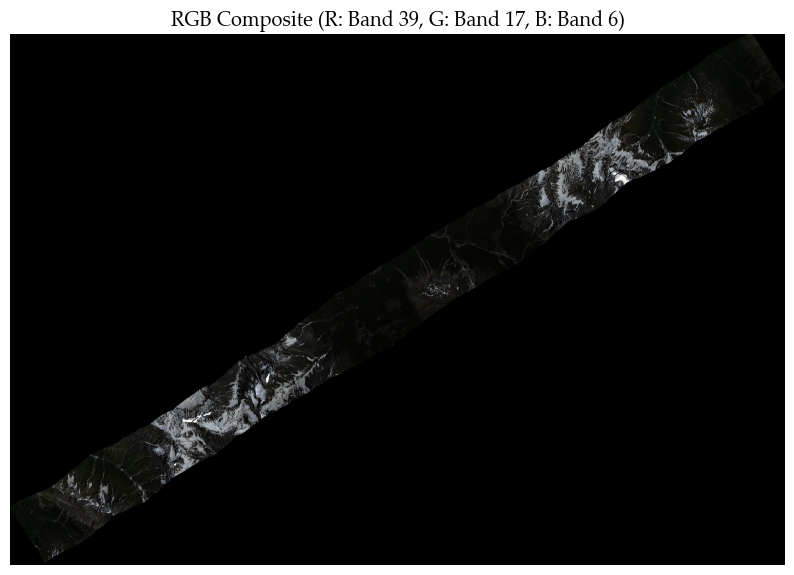

In [30]:
# Open the raster
with rasterio.open(df_modified.loc[df_modified['year_2010'].idxmax(), 'path']) as src:
    print(src.profile)  # Check metadata, e.g., count of bands
    
    # Read bands (rasterio band index starts at 1)
    band_red = src.read(39)
    band_green = src.read(17)
    band_blue = src.read(6)

# Normalize the bands to [0, 1] for display
def normalize(array):
    array_min, array_max = np.nanmin(array), np.nanmax(array)
    return (array - array_min) / (array_max - array_min)

red_norm = normalize(band_red)
green_norm = normalize(band_green)
blue_norm = normalize(band_blue)

# Stack bands into an RGB image
rgb = np.dstack((red_norm, green_norm, blue_norm))

# Plot the RGB image
plt.figure(figsize=(10, 10))
plt.imshow(rgb)
plt.title('RGB Composite (R: Band 39, G: Band 17, B: Band 6)')
plt.axis('off')
plt.show()

In [11]:
# Define base folder
base_overlay = Path.cwd() / "PPR1_overlay_previews"

# Collect all CSVs matching the pattern recursively
csv_files_overlay = list(base_overlay.rglob("*_overlay_counts_summary.csv"))

# Read and combine them
df_all_overlay = pd.concat(
    (pd.read_csv(f).assign(source_folder=f.parent.name) for f in csv_files_overlay),
    ignore_index=True
)

# Optional: preview combined result
print(f"Found {len(csv_files_overlay)} files.")
# print(df_all_overlay.head())


Found 3 files.


In [12]:
display(df_all_overlay)

,Method,Name,path,year_2010,year_2012,year_2013,source_folder
0,Lambertian,CHNP1100624_042e_polishRefl_sub.bsq,D:\Main_Data_From_Christian_Anna-s_1st_SNP_DAT...,9,0,0,Lambertian
1,Lambertian,CHNP1100624_052e_polishRefl_sub.bsq,D:\Main_Data_From_Christian_Anna-s_1st_SNP_DAT...,19,0,0,Lambertian
2,Lambertian,CHNP1100624_062e_polishRefl_sub.bsq,D:\Main_Data_From_Christian_Anna-s_1st_SNP_DAT...,10,0,0,Lambertian
3,Lambertian,CHNP1100624_072e_polishRefl_sub.bsq,D:\Main_Data_From_Christian_Anna-s_1st_SNP_DAT...,5,0,0,Lambertian
4,Lambertian,CHNP2120629_a12d_polish_cube000_geo_s1.bsq,D:\Main_Data_From_Christian_Anna-s_1st_SNP_DAT...,0,33,0,Lambertian
5,Lambertian,CHNP2120629_a32d_polish_cube000_geo_s1.bsq,D:\Main_Data_From_Christian_Anna-s_1st_SNP_DAT...,0,65,0,Lambertian
6,Lambertian,CHNP2120629_a42d_polish_cube000_geo_s1.bsq,D:\Main_Data_From_Christian_Anna-s_1st_SNP_DAT...,0,26,0,Lambertian
7,Lambertian,M0038130712_a012e_reflct_cube000_geo.bsq,D:\Main_Data_From_Christian_Anna-s_1st_SNP_DAT...,0,0,47,Lambertian
8,Lambertian,M0038130712_a032e_reflct_cube000_geo.bsq,D:\Main_Data_From_Christian_Anna-s_1st_SNP_DAT...,0,0,78,Lambertian
9,Lambertian,M0038130712_a052e_reflct_cube000_geo.bsq,D:\Main_Data_From_Christian_Anna-s_1st_SNP_DAT...,0,0,33,Lambertian


## Flight Lines to be used for the Biomass maps in PPR1

In [13]:
years = ["year_2010", "year_2012", "year_2013"]
out = []

for y in years:
    m = df_all_overlay.groupby("Method")[y].transform("max")
    # rows that hit the per-method max for this year
    tmp = df_all_overlay[df_all_overlay[y] == m].copy()
    tmp["year"] = y.replace("year_", "")
    out.append(tmp)

max_rows = pd.concat(out, ignore_index=True)

# Example: show Method, path (and the winning value for clarity)
cols_to_show = ["Method", "path", "year_2010", "year_2012", "year_2013"]
max_rows_display = max_rows[cols_to_show]
# type(max_rows_display)
display(max_rows_display)

# It shows the maximum plot numbers on the respective year's flight line and its path.
# Is is usefull because we don't mosaick flight lines 
# to be able to show biomass gradient better on maps

,Method,path,year_2010,year_2012,year_2013
0,Lambertian,D:\Main_Data_From_Christian_Anna-s_1st_SNP_DAT...,19,0,0
1,Minnaert,D:\MM010_reprocessed_ibrdf2\MM010_CHNP__100624...,19,0,0
2,Modified_Minnaert,F:\SNP_BRDF_21_MAIN_georectified_data\2010\MM0...,19,0,0
3,Lambertian,D:\Main_Data_From_Christian_Anna-s_1st_SNP_DAT...,0,65,0
4,Minnaert,E:\APEX_DATA_SNP_IBRDF_2\SNP_2012\MM047_CHNP__...,0,65,0
5,Modified_Minnaert,F:\SNP_BRDF_21_MAIN_georectified_data\2012\MM0...,0,65,0
6,Lambertian,D:\Main_Data_From_Christian_Anna-s_1st_SNP_DAT...,0,0,78
7,Minnaert,E:\APEX_DATA_SNP_IBRDF_2\SNP_2013\MM064_CHNP__...,0,0,78
8,Modified_Minnaert,F:\SNP_BRDF_21_MAIN_georectified_data\2013\MM0...,0,0,78


In [17]:
import os

# Get current working directory
cwd = os.getcwd()
print("CWD:", cwd)

# Define output folder and ensure it exists
out_dir = os.path.join(cwd, "PPR1_overlay_previews")
os.makedirs(out_dir, exist_ok=True)

# Define output path
out_path = os.path.join(out_dir, "overlay_previews_max_rows_display.csv")

# Save DataFrame as CSV
max_rows_display.to_csv(out_path, index=False)

print(f"Saved CSV to: {out_path}")


CWD: C:\Users\NargizSafaraliyeva\OneDrive - geo.uzh.ch\Desktop\2nd-paper\phd_ppr2
Saved CSV to: C:\Users\NargizSafaraliyeva\OneDrive - geo.uzh.ch\Desktop\2nd-paper\phd_ppr2\PPR1_overlay_previews\overlay_previews_max_rows_display.csv


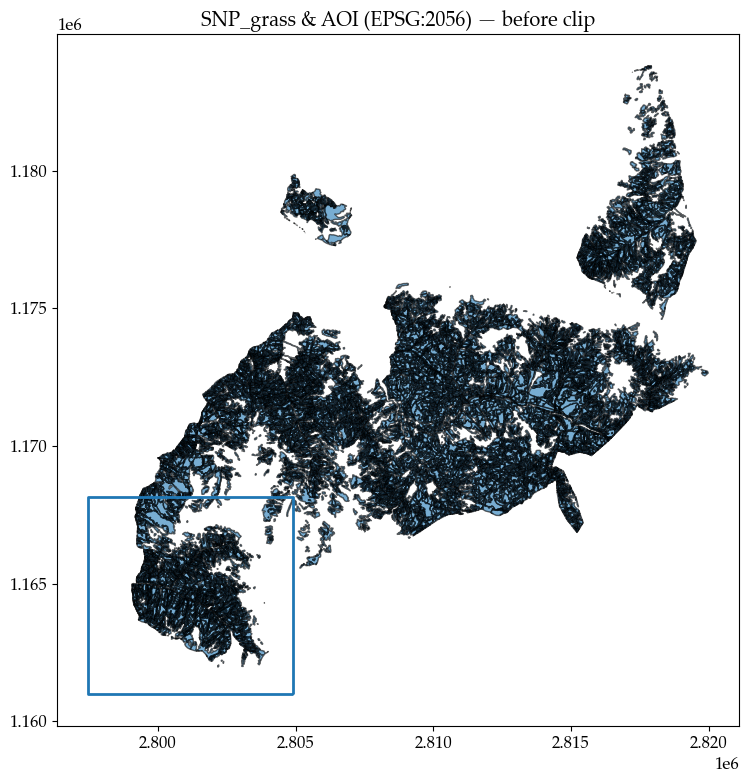

C:\Users\NargizSafaraliyeva\anaconda3\envs\geopandas_env\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


Saved clipped shapefile to: PPR1_Map_Data\SHAPEFILES\derived\SNP_grassland_clip_to_aoi_EPSG2056.shp


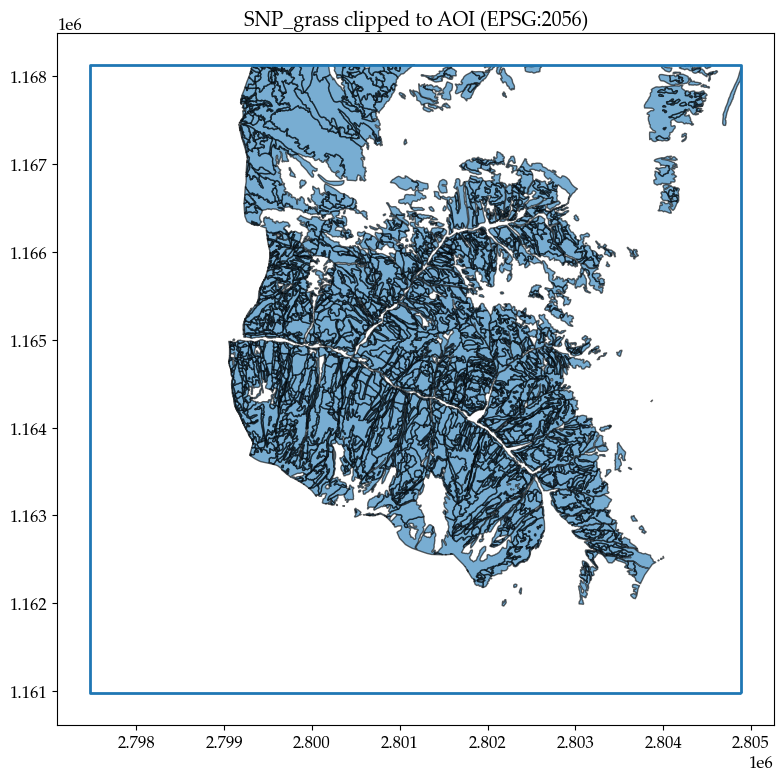

In [47]:
from pathlib import Path
import geopandas as gpd
import matplotlib.pyplot as plt

# -----------------------------
# 1) Paths (relative to your CWD = phd_ppr2)
# -----------------------------
SNP_grass_path = Path("PPR1_Map_Data/SHAPEFILES/.../Habitalp_SNP_grassland_fit.shp")
aoi_pathi      = aoi_pathi = Path(r"C:\Users\...\PPR1_Maps\mosaic_extent_rect_EPSG2056.shp")

# Output path
out_dir = Path("PPR1_Map_Data/SHAPEFILES/derived")
out_dir.mkdir(parents=True, exist_ok=True)
out_path = out_dir / "SNP_grassland_clip_to_aoi_EPSG2056.shp"

# -----------------------------
# 2) Read shapefiles
# -----------------------------
SNP_grass = gpd.read_file(SNP_grass_path)
AOI       = gpd.read_file(aoi_pathi)

# -----------------------------
# 3) Reproject both to EPSG:2056
# -----------------------------
TARGET_CRS = "EPSG:2056"
if SNP_grass.crs is None:
    raise ValueError("SNP_grass has no CRS set. Please set the correct source CRS before reprojecting.")
if AOI.crs is None:
    raise ValueError("AOI has no CRS set. Please set the correct source CRS before reprojecting.")

SNP_grass_2056 = SNP_grass.to_crs(TARGET_CRS)
AOI_2056       = AOI.to_crs(TARGET_CRS)

# (optional) fix invalid geometries
SNP_grass_2056["geometry"] = SNP_grass_2056.buffer(0)
AOI_2056["geometry"]       = AOI_2056.buffer(0)

# -----------------------------
# 4) Visualize AOI on top of SNP_grass (pre-clip)
# -----------------------------
ax = SNP_grass_2056.plot(figsize=(8, 8), alpha=0.6, edgecolor="k")
AOI_2056.boundary.plot(ax=ax, linewidth=2)  # AOI as outline
ax.set_title("SNP_grass & AOI (EPSG:2056) — before clip")
plt.tight_layout()
plt.show()

# -----------------------------
# 5) Clip SNP_grass to AOI extent (union/dissolve AOI first)
# -----------------------------
AOI_union = AOI_2056.dissolve()  # single polygon (or multi) to clip against
SNP_grass_clip = gpd.clip(SNP_grass_2056, AOI_union)

# -----------------------------
# 6) Save clipped output as a new shapefile
# -----------------------------
SNP_grass_clip.to_file(out_path)
print(f"Saved clipped shapefile to: {out_path}")

# -----------------------------
# 7) Visual confirmation plot (post-clip)
# -----------------------------
ax2 = SNP_grass_clip.plot(figsize=(8, 8), alpha=0.6, edgecolor="k")
AOI_2056.boundary.plot(ax=ax2, linewidth=2)
ax2.set_title("SNP_grass clipped to AOI (EPSG:2056)")
plt.tight_layout()
plt.show()
